In [6]:
import requests, json
import matplotlib.pyplot as plt
#匯入 matplotlib 函式庫底下的 pyploy 函式，並且將其命名為plt

In [8]:
url = 'https://www.dcard.tw/service/api/v2/forums/2019_ncov/posts?popular=true&limit=30'
#將所欲爬取api網址放入等號左邊url變數存放

res = requests.get(url)
#透過requests.get()請求上述網址內容，並且將它放入等號左邊的res變數存放
resjson = json.loads(res.text)
#藉由json.loads()載入上述請求完成的text內容，並且將它放入等號左邊的resjson變數存放

In [9]:
resjson

[{'id': 232982492,
  'title': '#公告 武漢肺炎專板設立',
  'excerpt': '各位卡友好，為了讓大家更好查找、討論疫情資訊，特別設立「武漢肺炎」臨時專板，歡迎卡友多加利用。本看板為討論武漢肺炎防疫知識、疫情最新情報及相關新聞之專區。惟請注意板規第一條：嚴禁散佈任何未經證實的消息',
  'anonymousSchool': False,
  'anonymousDepartment': False,
  'pinned': True,
  'forumId': '8cb36269-9d1a-4044-962a-e45126b8dbda',
  'replyId': None,
  'createdAt': '2020-01-30T05:31:31.649Z',
  'updatedAt': '2020-12-08T05:16:12.340Z',
  'commentCount': 198,
  'likeCount': 2997,
  'withNickname': True,
  'tags': [],
  'topics': ['武漢肺炎'],
  'meta': {'layout': 'classic'},
  'forumName': '武漢肺炎',
  'forumAlias': '2019_ncov',
  'nsfw': False,
  'gender': 'D',
  'school': '板務小天使',
  'department': 'community',
  'replyTitle': None,
  'mediaMeta': [],
  'reactions': [{'id': '286f599c-f86a-4932-82f0-f5a06f1eca03', 'count': 2962},
   {'id': '4b018f48-e184-445f-adf1-fc8e04ba09b9', 'count': 14},
   {'id': 'e8e6bc5d-41b0-4129-b134-97507523d7ff', 'count': 14},
   {'id': '011ead16-9b83-4729-9fde-c588920c6c2d', 'count': 4},
   {'id': 'aa0d42

In [10]:
gender_count = {'F':0, 'M':0, 'D':0}
#自製一個含有F與M欄位的json型態資料gender_count，F與M的初始直皆設為0。
#此json型態資料可視為計數器，用來對應api中的F與M發生次數。

In [11]:
#從resjson基底資料中，透過迴圈每次提取一筆當下的outcome['gender']，
#若outcome['gender'] = 'M'，將它+1以後覆蓋等號左邊的上一狀態'M'值。
#而若outcome['gender'] = 'F'，同樣將它+1以後覆蓋等號左邊的上一狀態'F'值。
for outcome in resjson:
    gender_count[outcome['gender']] = gender_count[outcome['gender']]+1

In [12]:
gender_count['M']

3

In [13]:
gender_count['F']

2

In [14]:
sex = ['女性','男性']
#手動設計一個list型態資料，內有兩個元素(及女性及男性)
#此用途為提供後續作圖時所需要顯示的資料欄位名稱

In [15]:
total = [gender_count['F'],gender_count['M']]
#當迴圈執行完畢，表示所有資料皆以遍歷完畢，最終將結果放入等號左邊的total變數存放

In [18]:
plt.rcParams['font.sans-serif'] = ['DFKai-SB']
#由於pyplot在預設情況下中文資料會出現亂碼，故透過rcParams來設定能夠支援的中文字型
#若上述['SimHei']無法正常顯示表示電腦缺乏該字型，此時可改成['DFKai-SB']字型或其他字型來代替

<BarContainer object of 2 artists>

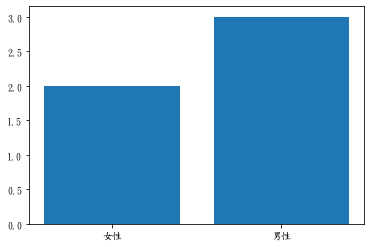

In [19]:
plt.bar(sex, total)
#透過plt底下的bar()函式來繪製長條圖，其中括號內第一個參數為x軸資料欄位名稱
#第二個參數則是資料數值列